<h2>Assignment 1 - Linear Regression on Diabetes Dataset</h2>

In [2]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

<h4>Task  1: Prepare the 3 datasets</h4>

In [3]:
# please implement your code for task 1 here

X_train, X_temp, Y_train, Y_temp = train_test_split(data, target, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("Training X dimension: ", X_train.shape)
print("Training Y dimension: ", Y_train.shape)
print("Validation X dimension: ", X_val.shape)
print("Validation Y dimension: ", Y_val.shape)
print("Testing X dimension: ", X_test.shape)
print("Testing Y dimension: ", Y_test.shape)

Training X dimension:  (265, 10)
Training Y dimension:  (265,)
Validation X dimension:  (88, 10)
Validation Y dimension:  (88,)
Testing X dimension:  (89, 10)
Testing Y dimension:  (89,)


<h4>Task 2: Use linear regression from scikit-learn in the following cell, for comparsion of results with basic gradient method and stochastic gradient descent method</h4>

Note: linear regression from scikit-learn uses the closed-form solution of the optimal solution.

Linear Regression from Scikit-learn
Bias:  148.92850837170067
Weights:  [  18.08799763 -227.04344876  592.27723487  361.54123241 -655.90738774
  353.71636413   14.41265469  142.87369371  594.01542882   31.67317969]
1473.4267966748673
Model Training Error:  1473.4267966748673
Model Validation Error:  1207.8461349484503
Model Testing Error:  1622.805700487619


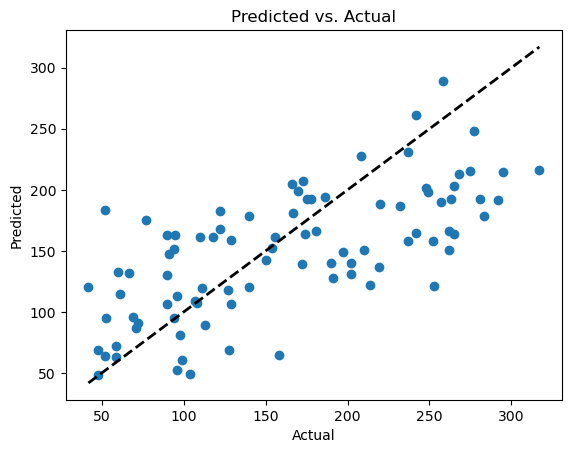

In [4]:
# please implement your code for task 2 here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, Y_train)

print("Linear Regression from Scikit-learn")
print("Bias: ", model.intercept_)
print("Weights: ", model.coef_)

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

train_error = np.sum((Y_train - train_pred) ** 2) / (2 * train_pred.shape[0])
val_error = np.sum((Y_val - val_pred) ** 2) / (2 * val_pred.shape[0])
test_error = np.sum((Y_test - test_pred) ** 2) / (2 * test_pred.shape[0])

print(train_error)

# calculates mean squared error
print("Model Training Error: ", train_error)
print("Model Validation Error: ", val_error)
print("Model Testing Error: ", test_error)

# plot predicted vs actual values
plt.scatter(Y_test, test_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.show()


<h4> Task 3: Use basic gradient descent to perform linear regression in the following cell</h4>

Note: Basic gradient descent method computes the gradient using whole training data examples in each iteration.

Linear Regression from Basic Gradient Descent
Bias:  [151.01986745]
Weights:  [[  1.29260486]
 [-10.71383226]
 [ 28.96261461]
 [ 17.19778844]
 [ -6.03738998]
 [ -3.82005046]
 [ -9.70057923]
 [  5.05142035]
 [ 17.91044098]
 [  1.6418518 ]]
Training Dataset Error:  1479.781895451976
Validation Dataset Error:  1220.1913275125498
Testing Dataset Error:  1649.5704018586362


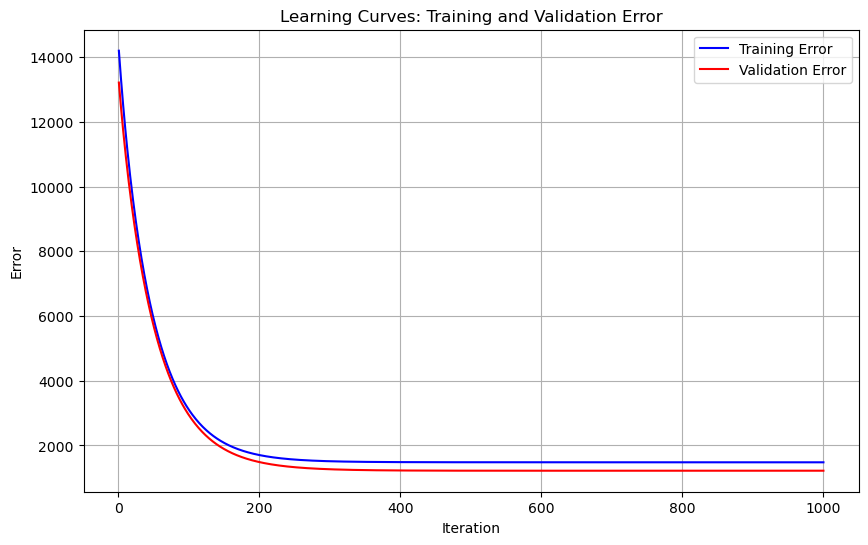

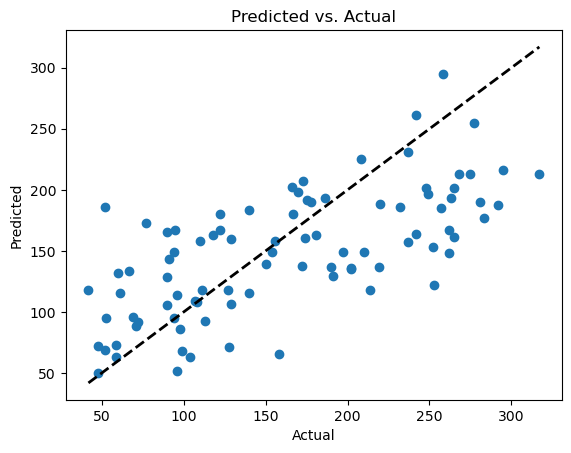

In [5]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.01   # learning rate
numItrs = 1000   # number of iterations

# please implement your code for task 3 here

# used to standardize features by removing the mean and scaling to unit variance --> mean of 0 and standard deviation of 1 for each feature column
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# incorporate 1s into data (w_0)
X_train_intercept = np.insert(X_train, 0, 1, axis=1)
X_val_intercept = np.insert(X_val, 0, 1, axis=1)
X_test_intercept = np.insert(X_test, 0, 1, axis=1)

# reshape target from 1D vector to 2D matrix
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_val = Y_val.reshape(Y_val.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

# linear regression model function
def myModelFunction(X, w):
    return np.dot(X, w)

# loss function
def myLossFunction(X, w, y):
    return np.sum((myModelFunction(X, w) - y) ** 2) / (2 * X.shape[0])

# gradient descent
def myTrainingLoop(train_data, train_target, val_data, val_target, learning_rate, num_iterations):
    # store errors
    train_losses = np.zeros((num_iterations, 1))
    val_losses = np.zeros((num_iterations, 1))
    
    w = np.random.normal(0, 1, (train_data.shape[1], 1))
    
    for i in range(num_iterations):

        # compute predictions
        Xw = myModelFunction(train_data, w)

        # compute gradients
        grad = -1 * np.dot(train_data.T, (train_target - Xw)) / train_data.shape[0]

        # update weights
        w = w - learning_rate * grad
        
        train_losses[i] = myLossFunction(train_data, w, train_target)
        val_losses[i] = myLossFunction(val_data, w, val_target)
        
    return w, train_losses, val_losses


w, train_losses, val_losses = myTrainingLoop(X_train_intercept, Y_train, X_val_intercept, Y_val, learning_rate, numItrs)

print("Linear Regression from Basic Gradient Descent")
# print bias and weights
print("Bias: ", w[0])
print("Weights: ", w[1:, :])


# test predictions and accuracy
test_predictions = myModelFunction(X_test_intercept, w)
test_loss = myLossFunction(X_test_intercept, w, Y_test)

# model errors
print("Training Dataset Error: ", train_losses[-1, 0])
print("Validation Dataset Error: ", val_losses[-1, 0])
print("Testing Dataset Error: ", test_loss)

# plot learning curve for training and validation dataset
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Error', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Error', color='red')

plt.title("Learning Curves: Training and Validation Error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# plot predicted vs actual values
plt.scatter(Y_test, test_predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual")
plt.show()


<h4> Task 4: Use stochastic gradient descent to perform linear regression in the following cell</h4>

Note:
* Stochastic gradient descent method computes the gradient using only a small **batch** of data examples in each iteration.
* Difference between iterations and epochs
> One **iteration** entails the processing of one batch of data, while one epoch entails the processing of the whole training data.




Linear Regression from SGD
Bias:  [151.13172384]
Weights:  [[  1.43936424]
 [-11.22962984]
 [ 30.01634609]
 [ 16.99876133]
 [ -5.87876412]
 [ -4.88344054]
 [ -9.34966386]
 [  5.48752481]
 [ 17.2009261 ]
 [  1.92643465]]
Training Dataset Error:  1063.4698897909445
Validation Dataset Error:  1223.1264096250704
Testing Dataset Error:  1667.2463411390506


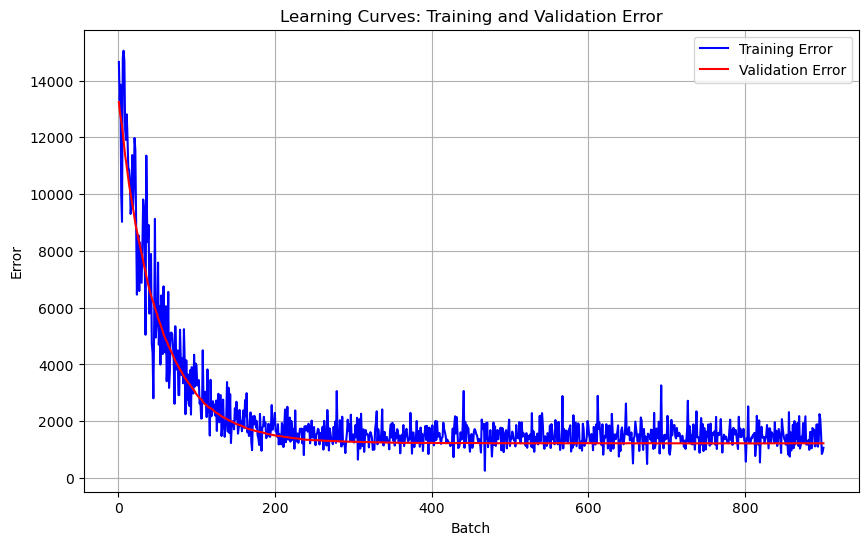

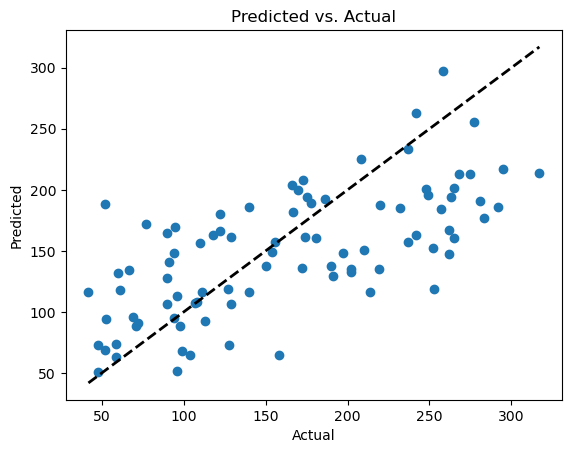

In [45]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.01   # learning rate
batch_size = 32 # number of data samples in a batch
epochs = 100   # number of epochs

# please implement your code for task 4 here

# linear regression model function
def mySGDTrainingLoop(train_data, train_target, val_data, val_target, learning_rate, batch_size, epochs):

    # calculate tot
    n = train_data.shape[0]
    num_batches_per_epoch = int(np.ceil(n / batch_size))
    
    # store errors
    train_losses = np.zeros((epochs * num_batches_per_epoch, 1))
    val_losses = np.zeros((epochs * num_batches_per_epoch, 1))
    
    w = np.random.normal(0, 1, (train_data.shape[1], 1))

    # total training samples
    n = train_data.shape[0]

    # batch counter
    batch_counter = 0
    
    # training loop
    for epoch in range(epochs):
        
        # shuffle training data for each epoch
        new_order = np.random.permutation(n)
        train_data_shuffled = train_data[new_order]
        train_target_shuffled = train_target[new_order]

        # iterate over batches and update weights
        for i in range(0, n, batch_size):
            X_batch = train_data_shuffled[i : i + batch_size]
            Y_batch = train_target_shuffled[i : i + batch_size]

            # compute predictions
            Xw = myModelFunction(X_batch, w)

            # compute gradient
            grad = -1 * np.dot(X_batch.T, (Y_batch - Xw)) / X_batch.shape[0]

            # update weights
            w = w - learning_rate * grad  

            # compute loss for current batch
            train_losses[batch_counter] = myLossFunction(X_batch, w, Y_batch)
            val_losses[batch_counter] = myLossFunction(val_data, w, val_target)
            batch_counter += 1

    return w, train_losses, val_losses

w, train_losses, val_losses = mySGDTrainingLoop(X_train_intercept, Y_train, X_val_intercept, Y_val, learning_rate, batch_size, epochs)

print("Linear Regression from SGD")
# print bias and weights
print("Bias: ", w[0])
print("Weights: ", w[1:, :])

# test predictions and accuracy
test_predictions = myModelFunction(X_test_intercept, w)
test_loss = myLossFunction(X_test_intercept, w, Y_test)

# model errors
print("Training Dataset Error: ", train_losses[-1, 0])
print("Validation Dataset Error: ", val_losses[-1, 0])
print("Testing Dataset Error: ", test_loss)

# plot learning curve for training and validation dataset
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training Error', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation Error', color='red')

plt.title("Learning Curves: Training and Validation Error")
plt.xlabel("Batch")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# plot predicted vs actual values
plt.scatter(Y_test, test_predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual")
plt.show()
          